# **Image compression and reconstruction with Autoencoders Model using Fashion MNIST dataset**

In [1]:
# Loading and Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam

from skimage.metrics import structural_similarity as ssim

(X_train, _), (X_test,_) = fashion_mnist.load_data()

# Normalization
X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0

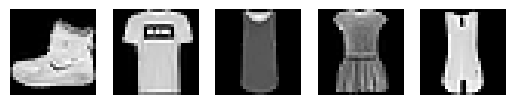

In [2]:
# Visualizing
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [3]:
# Converting 28x28 size images to a 784 size vector

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [4]:
# Defining model parameters for autoencoders
input_dim = X_train.shape[1] # input dim = 784
encoding_dim = 64 

# Building Encoder
input_image = Input(shape= (input_dim,))
encoded = Dense(512, activation="relu")(input_image) # First hidden layer (512 neuron)
encoded = Dense(256, activation="relu")(input_image) # Second hidden layer (256 neuron)
encoded = Dense(128, activation="relu")(encoded) # Third hidden layer (128 neuron)
encoded = Dense(encoding_dim, activation="relu")(encoded) # Compressed layer (64 dim)

# Building Decoder
decoded = Dense(128, activation="relu")(encoded) # First extension layer 
decoded = Dense(256, activation="relu")(decoded) # Second decoder layer
decoded = Dense(512, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded) # Output Layer (784 dim)

# Creating Autoencoder = encoder + decoder
autoencoder = Model(input_image, decoded)

autoencoder.compile(optimizer = Adam(), loss = "binary_crossentropy")

history = autoencoder.fit(X_train, X_train, # Input and target must be the same value (otonom)
                          epochs = 100,
                          batch_size = 64,
                          shuffle = True,
                          validation_data = (X_test,X_test),
                          verbose =1)



Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3599 - val_loss: 0.2944
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2894 - val_loss: 0.2864
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2816 - val_loss: 0.2818
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2786 - val_loss: 0.2787
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2760 - val_loss: 0.2766
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2740 - val_loss: 0.2753
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2724 - val_loss: 0.2741
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2717 - val_loss: 0.2739
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2697 - val_loss: 0.2726
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2698 - val_loss: 0.2720
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2686 - val_loss: 0.2711
Epoch 12/100
938/938 ━━━━━━━━━━━━━━━━━━━━

In [9]:
# Dividing the model into two as encoder and decoder
encoder = Model(input_image, encoded)

# decoder
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-4](encoded_input)
decoder_layer2 = autoencoder.layers[-3](decoder_layer1)
decoder_layer3 = autoencoder.layers[-2](decoder_layer2)
decoder_output = autoencoder.layers[-1](decoder_layer3)

decoder = Model(encoded_input, decoder_output)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


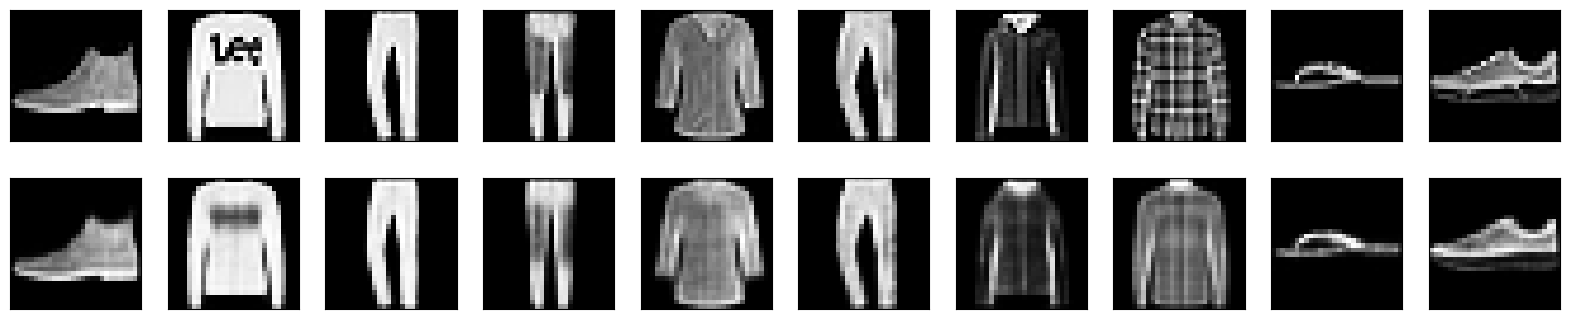

In [10]:
encoded_images = encoder.predict(X_test)
decoded_images = decoder.predict(encoded_images)

# Visualizing original and decoded_images
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    
    # Original image
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray") # It is converted to the original image size.
    ax.get_xaxis().set_visible(False) # x axis is hidden
    ax.get_yaxis().set_visible(False)
    
    # Decoded image
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap="gray")
    ax.get_xaxis().set_visible(False) # x axis is hidden
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
# Calculating SSIM Scores

def compute_ssim(original, reconstructed):
    """
        Calculate ssim score between both images (between 0-1)
    
    """
    original = original.reshape(28,28)
    reconstructed = reconstructed.reshape(28,28)
    return ssim(original, reconstructed, data_range=1)

In [12]:
ssim_score = []

for i in range(100):
    original_img = X_test[i]
    reconstructed_img = decoded_images[i]
    score = compute_ssim(original_img, reconstructed_img)
    ssim_score.append(score)
    
average_ssim = np.mean(ssim_score)
print("SSIM : ", average_ssim)

SSIM :  0.8431937388886692
